### Cifar10


- Download dataset

Reference: https://www.kaggle.com/c/cifar-10/


#### Pretraining

In [2]:
%cd ..

E:\Omdena\end-to-end-image-classification\e2e_img


In [3]:
%%writefile experiments/resnet18/params.json


{
    "seed": 42,
    "num_workers": 2,

    "learning_rate": 1e-3,
    "batch_size": 2048,
    "epochs": 15,
    "test_split_ratio": 0.1,
    "num_classes": 10,
    "folds": 4,
    "embed_size": 256,

    "input_channels": 3,
    "width": 32,
    "height": 32,
    "means": [0.485, 0.456, 0.406],
    "stds": [0.229, 0.224, 0.225],

    "train_root_dir": "datasets/cifar-10/train",
    "save_model_path": "experiments/resnet18/models/resnet18.pth",
    "trained_model_path": null,

    "model_name": "resnet18",
    "optimizer": "AdamW",
    "scheduler": "OneCycleLR",
    "feature_extract": true,
    "use_pretrain" : true,
    "finetune_layer": -1,
    "use_wandb": true,
    "convert_onnx": true
}

Overwriting experiments/resnet18/params.json


In [4]:
from train import ClassifierModel

In [6]:
model_dir = "experiments/resnet18"
experiment = "cifar10"
model = ClassifierModel(model_dir, experiment)

Creating a logging file at experiments/resnet18\resnet18.log
Parent Directory experiments/resnet18 exists!!
Creating models directory at experiments/resnet18\models
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\shubh/.netrc
wandb: wandb version 0.11.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


--------------------------------------------------------------------------------
Hyperparameters: 
--------------------------------------------------------------------------------
Saved model not found at experiments/resnet18/models/resnet18.pth


{'batch_size': 2048,
 'convert_onnx': True,
 'embed_size': 256,
 'epochs': 15,
 'feature_extract': True,
 'finetune_layer': -1,
 'folds': 4,
 'height': 32,
 'input_channels': 3,
 'learning_rate': 0.001,
 'means': [0.485, 0.456, 0.406],
 'model_name': 'resnet18',
 'num_classes': 10,
 'num_workers': 2,
 'optimizer': 'AdamW',
 'save_model_path': 'experiments/resnet18/models/resnet18.pth',
 'scheduler': 'OneCycleLR',
 'seed': 42,
 'stds': [0.229, 0.224, 0.225],
 'test_split_ratio': 0.1,
 'train_root_dir': 'datasets/cifar-10/train',
 'trained_model_path': None,
 'use_pretrain': True,
 'use_wandb': True,
 'width': 32}


Loading pretrained weights from url (https://download.pytorch.org/models/resnet18-5c106cde.pth)


- Replace only `datasets_to_df` in utils.py with

```
def datasets_to_df(ds_path: str):
    """
    Convert dataset folder to pandas dataframe format

    Args:
        ds_path (string): Path to dataset

    Returns:
        pd.DataFrame : A pandas dataframe containing paths to dataset and labels.
    """
    if not os.path.exists(ds_path):
        raise FileNotFoundError(f"Dataset directory not found: {ds_path}")
    df = pd.read_csv(ds_path)
    imgs = [str(i)+'.png' for i in df['id'].values]
    lbls = df['label'].values
    return pd.DataFrame(zip(imgs, lbls), columns=["file", "label"])
    
```

Check the function `prepare_df` in `main.py` if it's compatible.

In [7]:
train_df = model.prepare_df("datasets/cifar-10/trainLabels.csv")

Label Encoding: ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']
Label Mapping: {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


Class weights for labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Loading data
Training shape: (45000,), (45000,), (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500],
      dtype=int64))
Validation shape: (5000,), (5000,), (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500], dtype=int64))
Start training pretrained models
Loading pretrained weights from url (https://download.pytorch.org/models/resnet18-5c106cde.pth)

---------- EPOCH: 1 | 15 ----------

train_loss: 2.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [02:48<00:00,  7.66s/it]
Phase: train | Loss 3.0494 | Accuracy 0.2259 | F1 0.1836 | Precision 0.3580 | Recall 0.2261
val_loss: 1.85: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:25<00:00,  8.35s/it]


train_loss: 1.51: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:19<00:00,  1.16it/s]
Phase: train | Loss 1.5490 | Accuracy 0.4600 | F1 0.4552 | Precision 0.4683 | Recall 0.4609
val_loss: 1.46: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.63s/it]
Val acc improved from 0.4730 to 0.4804.
Phase: val | Loss 1.5088 | Accuracy 0.4804 | F1 0.4771 | Precision 0.4869 | Recall 0.4808

---------- EPOCH: 12 | 15 ----------

train_loss: 1.60: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:18<00:00,  1.17it/s]
Phase: train | Loss 1.5555 | Accuracy 0.4596 | F1 0.4561 | Precision 0.4656 | Recall 0.4601
val_loss: 1.46: 100%|█████████████████████████████████████████████████████████████████████████████████████████

(Height, Width, Channels: (32, 32, 3))
Creating dummy input to profile
Profiling model
Saving model at  experiments/resnet18\models\model.onnx


Performing calibration for rtol=0.1...


Checking that it all worked out


Passed 33554.png with relative tol=0.1
---------------
Passed 9428.png with relative tol=0.1
---------------
Passed 200.png with relative tol=0.1
---------------
Passed 12448.png with relative tol=0.1
---------------
Passed 39490.png with relative tol=0.1
---------------
Performing calibration for rtol=0.01...
Passed 33554.png with relative tol=0.01
---------------
Failed 9428.png with relative tol=0.01

Not equal to tolerance rtol=0.01, atol=1e-05

Mismatched elements: 2 / 10 (20%)
Max absolute difference: 0.001616
Max relative difference: 0.01911852
 x: array([[ 0.718873,  2.124745,  0.040488,  0.389622,  0.053247, -0.932955,
        -0.652579, -1.586834,  1.108185,  0.678547]], dtype=float32)
 y: array([[ 0.717573,  2.124615,  0.04091 ,  0.389546,  0.054285, -0.933011,
        -0.652777, -1.585218,  1.107039,  0.677744]], dtype=float32)
------------------------------
Failed 200.png with relative tol=0.01

Not equal to tolerance rtol=0.01, atol=1e-05

Mismatched elements: 1 / 10 (10%

Test Loss: 1.5088

Test Accuracy of     0: 56.40% (282/500)
Test Accuracy of     1: 62.80% (314/500)
Test Accuracy of     2: 36.80% (184/500)
Test Accuracy of     3: 41.00% (205/500)
Test Accuracy of     4: 53.40% (267/500)
Test Accuracy of     5: 31.40% (157/500)
Test Accuracy of     6: 54.60% (273/500)
Test Accuracy of     7: 50.80% (254/500)
Test Accuracy of     8: 45.00% (225/500)
Test Accuracy of     9: 48.20% (241/500)

 Test Accuracy (Overall):  48.04% (2402/5000)

 Confusion Matrix 
 [[282.  36.  37.  17.  14.   4.   9.  18.  45.  38.]
 [ 23. 314.   4.  17.   5.   9.  12.  17.  27.  72.]
 [ 57.  14. 184.  37.  80.  22.  51.  30.  17.   8.]
 [ 13.  28.  36. 205.  48.  53.  53.  35.  11.  18.]
 [ 20.   6.  38.  45. 267.   9.  48.  49.   6.  12.]
 [ 15.  38.  31. 102.  39. 157.  29.  71.   4.  14.]
 [  8.  11.  49.  46.  66.  20. 273.  12.   3.  12.]
 [ 21.  14.  19.  34.  81.  22.  21. 254.   6.  28.]
 [117.  48.  18.   6.  25.   4.   3.  13. 225.  41.]
 [ 27. 115.   9.  13.  17.

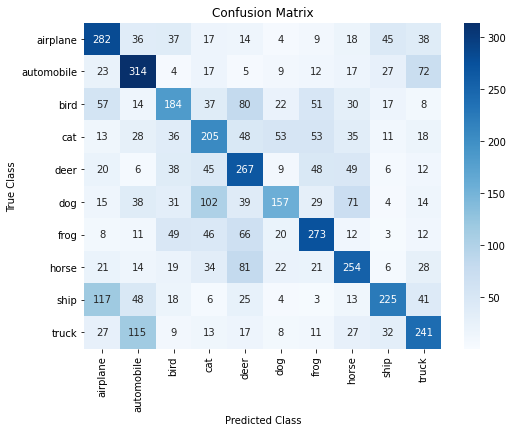


 Classification Report 
               precision    recall  f1-score   support

           0       0.48      0.56      0.52       500
           1       0.50      0.63      0.56       500
           2       0.43      0.37      0.40       500
           3       0.39      0.41      0.40       500
           4       0.42      0.53      0.47       500
           5       0.51      0.31      0.39       500
           6       0.54      0.55      0.54       500
           7       0.48      0.51      0.50       500
           8       0.60      0.45      0.51       500
           9       0.50      0.48      0.49       500

    accuracy                           0.48      5000
   macro avg       0.49      0.48      0.48      5000
weighted avg       0.49      0.48      0.48      5000



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


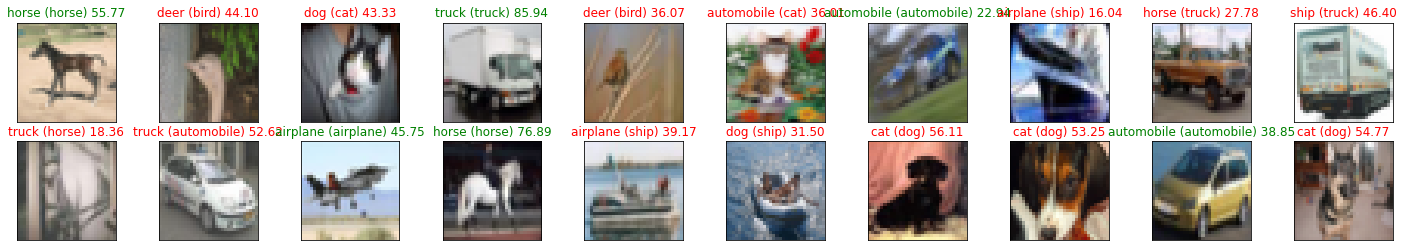

In [8]:
model.train(train_df)

#### Finetuning

In [1]:
%cd ..

E:\Omdena\end-to-end-image-classification\e2e_img


In [2]:
%%writefile experiments/resnet18/params.json


{
    "seed": 42,
    "num_workers": 2,

    "learning_rate": 1e-3,
    "batch_size": 2048,
    "epochs": 15,
    "test_split_ratio": 0.1,
    "num_classes": 10,
    "folds": 4,
    "embed_size": 256,

    "input_channels": 3,
    "width": 32,
    "height": 32,
    "means": [0.485, 0.456, 0.406],
    "stds": [0.229, 0.224, 0.225],

    "train_root_dir": "datasets/cifar-10/train",
    "save_model_path": "experiments/resnet18/models/resnet18_finetune.pth",
    "trained_model_path": null,

    "model_name": "resnet18",
    "optimizer": "AdamW",
    "scheduler": "OneCycleLR",
    "feature_extract": true,
    "use_pretrain" : true,
    "finetune_layer": 61,
    "use_wandb": true,
    "convert_onnx": true
}

Overwriting experiments/resnet18/params.json


In [3]:
from train import ClassifierModel
model_dir = "experiments/resnet18"
experiment = "cifar10"
model = ClassifierModel(model_dir, experiment)

Creating a logging file at experiments/resnet18\resnet18.log
Parent Directory experiments/resnet18 exists!!
Creating models directory at experiments/resnet18\models
wandb: Currently logged in as: dudeperf3ct (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.11.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


--------------------------------------------------------------------------------
Hyperparameters: 
--------------------------------------------------------------------------------
Saved model not found at experiments/resnet18/models/resnet18_finetune.pth


{'batch_size': 2048,
 'convert_onnx': True,
 'embed_size': 256,
 'epochs': 15,
 'feature_extract': True,
 'finetune_layer': 61,
 'folds': 4,
 'height': 32,
 'input_channels': 3,
 'learning_rate': 0.001,
 'means': [0.485, 0.456, 0.406],
 'model_name': 'resnet18',
 'num_classes': 10,
 'num_workers': 2,
 'optimizer': 'AdamW',
 'save_model_path': 'experiments/resnet18/models/resnet18_finetune.pth',
 'scheduler': 'OneCycleLR',
 'seed': 42,
 'stds': [0.229, 0.224, 0.225],
 'test_split_ratio': 0.1,
 'train_root_dir': 'datasets/cifar-10/train',
 'trained_model_path': None,
 'use_pretrain': True,
 'use_wandb': True,
 'width': 32}


Loading pretrained weights from url (https://download.pytorch.org/models/resnet18-5c106cde.pth)


In [4]:
train_df = model.prepare_df("datasets/cifar-10/trainLabels.csv")

Label Encoding: ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']
Label Mapping: {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


Class weights for labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Loading data
Training shape: (45000,), (45000,), (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500],
      dtype=int64))
Validation shape: (5000,), (5000,), (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500], dtype=int64))
Start training pretrained models
Loading pretrained weights from url (https://download.pytorch.org/models/resnet18-5c106cde.pth)

---------- EPOCH: 1 | 15 ----------

train_loss: 2.35: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:21<00:00,  1.03it/s]
Phase: train | Loss 2.9746 | Accuracy 0.2266 | F1 0.1814 | Precision 0.3556 | Recall 0.2255
val_loss: 1.89: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.58s/it]


train_loss: 1.54: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:18<00:00,  1.17it/s]
Phase: train | Loss 1.5483 | Accuracy 0.4597 | F1 0.4554 | Precision 0.4661 | Recall 0.4604
val_loss: 1.46: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.74s/it]
Val acc improved from 0.4724 to 0.4764.
Phase: val | Loss 1.5133 | Accuracy 0.4764 | F1 0.4746 | Precision 0.4829 | Recall 0.4765

---------- EPOCH: 12 | 15 ----------

train_loss: 1.63: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:19<00:00,  1.15it/s]
Phase: train | Loss 1.5594 | Accuracy 0.4567 | F1 0.4526 | Precision 0.4632 | Recall 0.4572
val_loss: 1.46: 100%|█████████████████████████████████████████████████████████████████████████████████████████


------------------------------ EPOCH: 6 | 22 ------------------------------

train_loss: 0.85: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:18<00:00,  1.17it/s]
Phase: train | Loss 0.8600 | Accuracy 0.6970 | F1 0.6958 | Precision 0.6988 | Recall 0.6970
val_loss: 0.98: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.57s/it]
Val acc improved from 0.6538 to 0.6630.
Phase: val | Loss 0.9838 | Accuracy 0.6630 | F1 0.6595 | Precision 0.6614 | Recall 0.6608

------------------------------ EPOCH: 7 | 22 ------------------------------

train_loss: 0.79: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:18<00:00,  1.16it/s]
Phase: train | Loss 0.8119 | Accuracy 0.7122 | F1 0.7109 | Precision 0.7121 | Recall 

val_loss: 1.07: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.73s/it]
Phase: val | Loss 1.1218 | Accuracy 0.6666 | F1 0.6662 | Precision 0.6691 | Recall 0.6677

------------------------------ EPOCH: 17 | 22 ------------------------------

train_loss: 0.53: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:19<00:00,  1.14it/s]
Phase: train | Loss 0.5322 | Accuracy 0.8143 | F1 0.8137 | Precision 0.8151 | Recall 0.8147
val_loss: 1.08: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.69s/it]
Phase: val | Loss 1.1248 | Accuracy 0.6678 | F1 0.6675 | Precision 0.6721 | Recall 0.6681

------------------------------ EPOCH: 18 | 22 ------------------------------

train_loss: 0.57: 100%|██████████

(Height, Width, Channels: (32, 32, 3))
Creating dummy input to profile
Profiling model
Saving model at  experiments/resnet18\models\model.onnx


Performing calibration for rtol=0.1...


Checking that it all worked out


Passed 33554.png with relative tol=0.1
---------------
Passed 9428.png with relative tol=0.1
---------------
Passed 200.png with relative tol=0.1
---------------
Passed 12448.png with relative tol=0.1
---------------
Passed 39490.png with relative tol=0.1
---------------
Performing calibration for rtol=0.01...
Passed 33554.png with relative tol=0.01
---------------
Passed 9428.png with relative tol=0.01
---------------
Passed 200.png with relative tol=0.01
---------------
Passed 12448.png with relative tol=0.01
---------------
Passed 39490.png with relative tol=0.01
---------------
Performing calibration for rtol=0.001...
Passed 33554.png with relative tol=0.001
---------------
Failed 9428.png with relative tol=0.001

Not equal to tolerance rtol=0.001, atol=1e-05

Mismatched elements: 1 / 10 (10%)
Max absolute difference: 0.00165176
Max relative difference: 0.00301286
 x: array([[ 5.093091, -0.261765, -3.984144, -1.212023, -3.621789, -4.391037,
        -4.052129, -4.579991,  9.259645, 

Test Loss: 0.9767

Test Accuracy of     0: 75.00% (375/500)
Test Accuracy of     1: 74.20% (371/500)
Test Accuracy of     2: 57.40% (287/500)
Test Accuracy of     3: 52.60% (263/500)
Test Accuracy of     4: 62.60% (313/500)
Test Accuracy of     5: 55.20% (276/500)
Test Accuracy of     6: 75.40% (377/500)
Test Accuracy of     7: 75.00% (375/500)
Test Accuracy of     8: 76.00% (380/500)
Test Accuracy of     9: 72.80% (364/500)

 Test Accuracy (Overall):  67.62% (3381/5000)

 Confusion Matrix 
 [[375.  20.  20.   9.   4.   3.   4.  11.  33.  21.]
 [ 13. 371.   3.   9.   2.   1.   2.   7.  16.  76.]
 [ 30.   8. 287.  23.  48.  24.  43.  25.  10.   2.]
 [ 11.  11.  22. 263.  39.  80.  32.  19.  11.  12.]
 [ 20.   1.  29.  27. 313.  16.  27.  57.   1.   9.]
 [  9.   8.  28.  80.  21. 276.  22.  48.   6.   2.]
 [  3.   6.  29.  24.  23.  23. 377.   9.   5.   1.]
 [  8.   3.   8.  20.  37.  30.   9. 375.   2.   8.]
 [ 35.  33.   8.   1.   8.   1.   0.   2. 380.  32.]
 [ 15.  61.   2.   4.   5.

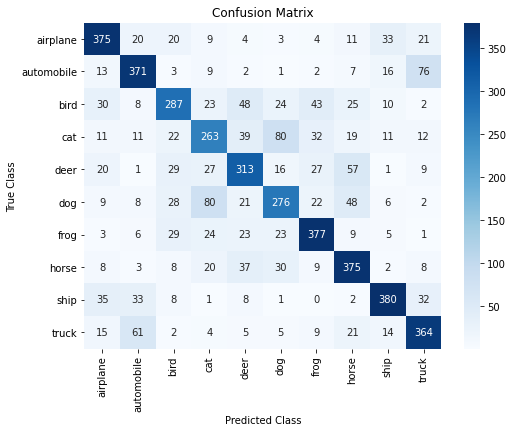


 Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.75      0.74       500
           1       0.71      0.74      0.73       500
           2       0.66      0.57      0.61       500
           3       0.57      0.53      0.55       500
           4       0.63      0.63      0.63       500
           5       0.60      0.55      0.58       500
           6       0.72      0.75      0.74       500
           7       0.65      0.75      0.70       500
           8       0.79      0.76      0.78       500
           9       0.69      0.73      0.71       500

    accuracy                           0.68      5000
   macro avg       0.67      0.68      0.67      5000
weighted avg       0.67      0.68      0.67      5000



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


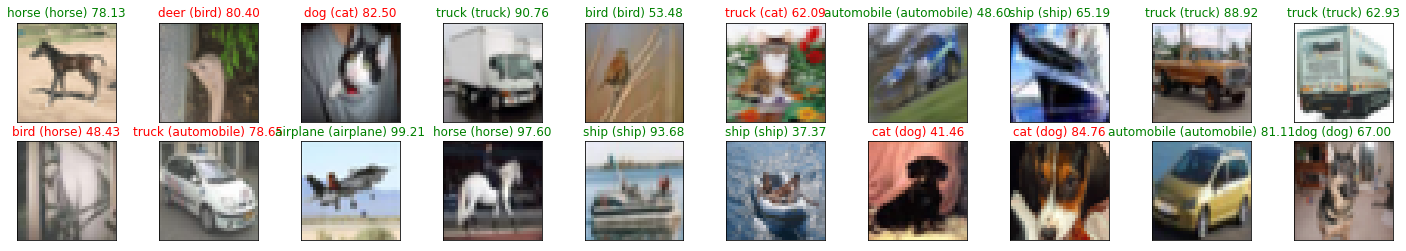

In [5]:
model.train(train_df)

#### Inference

In [6]:
from inference.inferPytorch import InferPytorch

infer_pytorch = InferPytorch("experiments/resnet18")

Successfully Pytorch model from  experiments/resnet18/models/resnet18_finetune.pth


In [7]:
import cv2

im = cv2.imread("datasets/cifar-10/train/1.png")
infer_pytorch.infer(im)

Converting bgr to rgb
Time to infer: 0.009s
Predictions | Probabilities
------------------------------
airplane        | 0.00%
automobile      | 0.06%
bird            | 0.03%
cat             | 4.19%
deer            | 1.26%
dog             | 25.41%
frog            | 68.98%
horse           | 0.07%
ship            | 0.00%
truck           | 0.00%
Top-1 Prediction: frog | Probability: 68.98%


'frog'

#### Benchmark Inference

In [8]:
from benchmark import InferenceBenchmarkRunner

# Benchmark inference time
for p in ["float32", "float16"]:
    print(f"Running inference benchmark with precision = {p}")
    benchmark = InferenceBenchmarkRunner("experiments/resnet18", p)
    print(benchmark.run())

Running inference benchmark with precision = float32
Loading model from path experiments/resnet18/models/resnet18_finetune.pth
Model created, param count: 11310410
Running inference benchmark on the model for 50 steps w/ input size (3, 32, 32) and batch size 2048.
Infer [10/50]. 36688.56 samples/sec. 55.821 ms/step.
Infer [20/50]. 36690.07 samples/sec. 55.819 ms/step.
Infer [30/50]. 36723.93 samples/sec. 55.767 ms/step.
Infer [40/50]. 36775.59 samples/sec. 55.689 ms/step.
Infer [50/50]. 36801.16 samples/sec. 55.650 ms/step.
Inference benchmark of the model done. 36741.12 samples/sec, 55.65 ms/step
{'samples_per_sec': 36741.12, 'step_time': 55.65, 'batch_size': 2048, 'img_size': 32, 'param_count': 11.31}
Running inference benchmark with precision = float16
Loading model from path experiments/resnet18/models/resnet18_finetune.pth
Model created, param count: 11310410
Running inference benchmark on the model for 50 steps w/ input size (3, 32, 32) and batch size 2048.
Infer [10/50]. 36784.7